# Stress Detection

This dataset comprises various mental health issues shared by individuals regarding their lives. It consists of 116 columns and 2838 rows. We will use nlp and machine learning techniques to detect stress in social media posts.

### Import Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows',120)

import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [2]:
df=pd.read_csv('stress.txt')

### Exploratory Data Analysis

In [3]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,lex_liwc_Sixltr,lex_liwc_Dic,lex_liwc_function,lex_liwc_pronoun,lex_liwc_ppron,lex_liwc_i,lex_liwc_we,lex_liwc_you,lex_liwc_shehe,lex_liwc_they,lex_liwc_ipron,lex_liwc_article,lex_liwc_prep,lex_liwc_auxverb,lex_liwc_adverb,lex_liwc_conj,lex_liwc_negate,lex_liwc_verb,lex_liwc_adj,lex_liwc_compare,lex_liwc_interrog,lex_liwc_number,lex_liwc_quant,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lex_liwc_anx,lex_liwc_anger,lex_liwc_sad,lex_liwc_social,lex_liwc_family,lex_liwc_friend,lex_liwc_female,lex_liwc_male,lex_liwc_cogproc,lex_liwc_insight,lex_liwc_cause,lex_liwc_discrep,lex_liwc_tentat,lex_liwc_certain,lex_liwc_differ,lex_liwc_percept,lex_liwc_see,lex_liwc_hear,lex_liwc_feel,lex_liwc_bio,lex_liwc_body,lex_liwc_health,lex_liwc_sexual,lex_liwc_ingest,lex_liwc_drives,lex_liwc_affiliation,lex_liwc_achieve,lex_liwc_power,lex_liwc_reward,lex_liwc_risk,lex_liwc_focuspast,lex_liwc_focuspresent,lex_liwc_focusfuture,lex_liwc_relativ,lex_liwc_motion,lex_liwc_space,lex_liwc_time,lex_liwc_work,lex_liwc_leisure,lex_liwc_home,lex_liwc_money,lex_liwc_relig,lex_liwc_death,lex_liwc_informal,lex_liwc_swear,lex_liwc_netspeak,lex_liwc_assent,lex_liwc_nonflu,lex_liwc_filler,lex_liwc_AllPunc,lex_liwc_Period,lex_liwc_Comma,lex_liwc_Colon,lex_liwc_SemiC,lex_liwc_QMark,lex_liwc_Exclam,lex_liwc_Dash,lex_liwc_Quote,lex_liwc_Apostro,lex_liwc_Parenth,lex_liwc_OtherP,lex_dal_max_pleasantness,lex_dal_max_activation,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,116,72.64,15.04,89.26,1.00,29.00,12.93,87.07,56.03,16.38,12.07,9.48,0.00,0.86,1.72,0.0,4.31,3.45,19.83,7.76,5.17,4.31,1.72,16.38,6.03,3.45,0.86,1.72,1.72,8.62,1.72,6.90,0.86,2.59,3.45,3.45,0.00,0.00,0.00,1.72,11.21,3.45,0.86,2.59,5.17,0.00,2.59,6.03,1.72,1.72,1.72,2.59,0.86,1.72,0.00,0.00,8.62,0.00,1.72,4.31,0.86,2.59,4.31,11.21,0.86,17.24,0.86,10.34,6.03,0.86,0.00,0.00,0.00,2.59,0.0,0.86,0.86,0.00,0.00,0.0,0.0,21.55,9.48,3.45,0.86,0.86,0.0,0.0,0.0,5.17,1.72,0.00,0.00,2.8571,2.6250,3.0,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,109,79.08,76.85,56.75,98.18,27.25,21.10,87.16,48.62,11.93,7.34,1.83,2.75,2.75,0.00,0.0,4.59,8.26,13.76,6.42,3.67,8.26,0.92,15.60,2.75,0.92,0.92,2.75,0.92,5.50,5.50,0.00,0.00,0.00,0.00,11.01,0.00,0.00,0.00,0.00,11.93,1.83,0.00,3.67,5.50,1.83,6.42,0.92,0.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.60,5.50,3.67,7.34,2.75,0.00,0.92,13.76,0.92,15.60,2.75,10.09,1.83,11.01,0.00,0.00,0.92,0.00,0.0,1.83,0.00,0.92,0.00,0.0,0.0,14.68,4.59,2.75,0.00,0.00,0.0,0.0,0.0,0.00,2.75,0.92,3.67,3.0000,2.8889,3.0,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,167,33.80,76.38,86.24,25.77,33.40,17.37,91.02,61.68,25.15,16.17,8.98,1.80,1.80,2.99,0.6,8.98,5.39,12.57,10.18,1.80,5.99,1.20,20.96,1.20,0.60,0.60,1.20,1.80,2.40,1.20,1.20,0.00,0.00,0.00,15.57,0.60,3.59,1.80,2.40,10.18,4.19,1.20,0.60,2.99,0.00,1.80,0.00,0.00,0.00,0.00,0.60,0.60,0.00,0.00,0.00,8.98,5.39,0.60,1.20,2.40,0.00,3.59,14.37,1.80,16.17,4.79,5.99,5.39,0.00,1.20,0.60,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,10.78,2.40,3.59,0.00,0.00,0.6,0.0,0.0,2.40,1.80,0.00,0.00,2.7143,3.0000,3.0,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,273,2.98,15.25,95.42,79.26,54.60,8.06,98.90,65.57,

In [4]:
df.sample(3)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,lex_liwc_Sixltr,lex_liwc_Dic,lex_liwc_function,lex_liwc_pronoun,lex_liwc_ppron,lex_liwc_i,lex_liwc_we,lex_liwc_you,lex_liwc_shehe,lex_liwc_they,lex_liwc_ipron,lex_liwc_article,lex_liwc_prep,lex_liwc_auxverb,lex_liwc_adverb,lex_liwc_conj,lex_liwc_negate,lex_liwc_verb,lex_liwc_adj,lex_liwc_compare,lex_liwc_interrog,lex_liwc_number,lex_liwc_quant,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lex_liwc_anx,lex_liwc_anger,lex_liwc_sad,lex_liwc_social,lex_liwc_family,lex_liwc_friend,lex_liwc_female,lex_liwc_male,lex_liwc_cogproc,lex_liwc_insight,lex_liwc_cause,lex_liwc_discrep,lex_liwc_tentat,lex_liwc_certain,lex_liwc_differ,lex_liwc_percept,lex_liwc_see,lex_liwc_hear,lex_liwc_feel,lex_liwc_bio,lex_liwc_body,lex_liwc_health,lex_liwc_sexual,lex_liwc_ingest,lex_liwc_drives,lex_liwc_affiliation,lex_liwc_achieve,lex_liwc_power,lex_liwc_reward,lex_liwc_risk,lex_liwc_focuspast,lex_liwc_focuspresent,lex_liwc_focusfuture,lex_liwc_relativ,lex_liwc_motion,lex_liwc_space,lex_liwc_time,lex_liwc_work,lex_liwc_leisure,lex_liwc_home,lex_liwc_money,lex_liwc_relig,lex_liwc_death,lex_liwc_informal,lex_liwc_swear,lex_liwc_netspeak,lex_liwc_assent,lex_liwc_nonflu,lex_liwc_filler,lex_liwc_AllPunc,lex_liwc_Period,lex_liwc_Comma,lex_liwc_Colon,lex_liwc_SemiC,lex_liwc_QMark,lex_liwc_Exclam,lex_liwc_Dash,lex_liwc_Quote,lex_liwc_Apostro,lex_liwc_Parenth,lex_liwc_OtherP,lex_dal_max_pleasantness,lex_dal_max_activation,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
346,stress,5ygchk,"[5, 10]",Ive never really had a problem with my educati...,1070,1,1.0,1489080203,3,6.849363,151,30.05,2.01,99.00,16.32,30.2,19.87,93.38,64.24,21.19,14.57,14.57,0.00,0.00,0.0,0.0,6.62,3.97,15.89,9.27,4.64,9.27,3.31,13.25,1.32,0.00,0.66,0.00,0.66,7.28,3.31,3.97,0.00,0.66,1.99,3.31,0.0,0.66,0.0,0.0,17.88,1.99,2.65,4.64,2.65,2.65,5.96,1.32,0.00,0.0,1.32,1.99,1.99,0.00,0.0,0.0,11.26,1.99,3.31,5.96,1.99,2.65,1.32,9.27,0.66,17.22,2.65,7.95,6.62,7.28,0.0,1.32,0.66,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,8.61,3.97,1.99,0.00,0.0,0.0,0.0,0.0,0.0,0.00,2.65,0.0,3.0000,2.6250,3.0,1.000,1.0000,1.0,1.73581,1.49333,1.92068,1.00,2,8.141953,0.307500
170,survivorsofabuse,5ujcdp,"(24, 29)",7. This study will include only participants w...,55151,0,1.0,1487294449,2,8.108684,76,59.58,99.00,33.36,74.74,15.2,22.37,88.16,52.63,17.11,13.16,0.00,3.95,9.21,0.0,0.0,3.95,5.26,13.16,6.58,3.95,6.58,1.32,11.84,2.63,2.63,1.32,5.26,2.63,5.26,3.95,1.32,0.00,0.00,0.00,27.63,0.0,1.32,0.0,0.0,7.89,1.32,0.00,3.95,5.26,0.00,5.26,1.32,1.32,0.0,0.00,0.00,0.00,0.00,0.0,0.0,5.26,5.26,0.00,0.00,0.00,0.00,0.00,10.53,2.63,15.79,2.63,7.89,5.26,5.26,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,10.53,6.58,2.63,1.32,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,2.7778,2.7500,2.8,1.125,1.1667,1.0,1.67852,1.52121,1.93119,0.61,2,8.348526,0.069444
2271,ptsd,5p8rpv,"(11, 16)",I'm assuming I have PTSD and my work gave me a...,10918,1,1.0,1484972470,2,1.141237,60,1.00,1.00,99.00,6.91,12.0,18.33,95.00,61.67,23.33,21.67,21.67,0.00,0.00,0.0,0.0,1.67,1.67,8.33,13.33,10.00,13.33,5.00,28.33,3.33,0.00,3.33,0.00,0.00,8.33,3.33,5.00,1.67,1.67,1.67,8.33,0.0,0.00,0.0,0.0,23.33,8.33,6.67,1.67,1.67,1.67,5.00,5.00,0.00,0.0,5.00,1.67,0.00,1.67,0.0,0.0,6.67,1.67,1.67,5.00,0.00,0.00,3.33,23.33,0.00,3.33,0.00,3.33,0.00,1.67,0.0,0.00,0.00,0.0,0.0,1.67,0.0,0.0,1.67,0.0,0.0,20.00,8.33,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.67,0.00,0.0,2.5714,2.8889,3.0,1.125,1.1429,1.0,1.73502,1.39649,1.87312,1.00,4,4.169723,-0.295833


In [5]:
df.shape

(2838, 116)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [7]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,lex_liwc_Sixltr,lex_liwc_Dic,lex_liwc_function,lex_liwc_pronoun,lex_liwc_ppron,lex_liwc_i,lex_liwc_we,lex_liwc_you,lex_liwc_shehe,lex_liwc_they,lex_liwc_ipron,lex_liwc_article,lex_liwc_prep,lex_liwc_auxverb,lex_liwc_adverb,lex_liwc_conj,lex_liwc_negate,lex_liwc_verb,lex_liwc_adj,lex_liwc_compare,lex_liwc_interrog,lex_liwc_number,lex_liwc_quant,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lex_liwc_anx,lex_liwc_anger,lex_liwc_sad,lex_liwc_social,lex_liwc_family,lex_liwc_friend,lex_liwc_female,lex_liwc_male,lex_liwc_cogproc,lex_liwc_insight,lex_liwc_cause,lex_liwc_discrep,lex_liwc_tentat,lex_liwc_certain,lex_liwc_differ,lex_liwc_percept,lex_liwc_see,lex_liwc_hear,lex_liwc_feel,lex_liwc_bio,lex_liwc_body,lex_liwc_health,lex_liwc_sexual,lex_liwc_ingest,lex_liwc_drives,lex_liwc_affiliation,lex_liwc_achieve,lex_liwc_power,lex_liwc_reward,lex_liwc_risk,lex_liwc_focuspast,lex_liwc_focuspresent,lex_liwc_focusfuture,lex_liwc_relativ,lex_liwc_motion,lex_liwc_space,lex_liwc_time,lex_liwc_work,lex_liwc_leisure,lex_liwc_home,lex_liwc_money,lex_liwc_relig,lex_liwc_death,lex_liwc_informal,lex_liwc_swear,lex_liwc_netspeak,lex_liwc_assent,lex_liwc_nonflu,lex_liwc_filler,lex_liwc_AllPunc,lex_liwc_Period,lex_liwc_Comma,lex_liwc_Colon,lex_liwc_SemiC,lex_liwc_QMark,lex_liwc_Exclam,lex_liwc_Dash,lex_liwc_Quote,lex_liwc_Apostro,lex_liwc_Parenth,lex_liwc_OtherP,lex_dal_max_pleasantness,lex_dal_max_activation,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.00000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,33.428157,18.189475,14.858157,92.349292,58.598887,19.767699,13.987530,9.066254,0.764679,0.865772,2.708076,0.582667,5.76902,4.937636,13.356656,10.306311,6.045853,7.599056,2.262903,19.431293,4.362734,2.287287,1.608217,1.444151,2.246406,6.097400,2.697861,3.304732,0.914197,0.928534,0.598453,10.827523,0.745211,0.555233,1.576614,1.976875,13.594961,2.855109,1.726441,1.947185,3.324757,1.544271,3.971931,2.246959,0.573115,0.613629,0.912163,2.610677,0.708584,1.246801,0.214109,0.405447,7.885211,2.737364,1.372812,2.414334,1.368855,0.720137,5.058562,12.324027,1.183273,14.254221,2.004397,6.295144,6.199316,1.875694,0.785134,0.635113,0.786226,0.115662,0.141811,0.825655,0.246483,0.255201,0.119112,0.124767,0.049856,17.053650,6.066293,3.573312,0.218788,0.123428,0.5190

In [8]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
label                       0
confidence                  0
social_timestamp            0
social_karma                0
syntax_ari                  0
lex_liwc_WC                 0
lex_liwc_Analytic           0
lex_liwc_Clout              0
lex_liwc_Authentic          0
lex_liwc_Tone               0
lex_liwc_WPS                0
lex_liwc_Sixltr             0
lex_liwc_Dic                0
lex_liwc_function           0
lex_liwc_pronoun            0
lex_liwc_ppron              0
lex_liwc_i                  0
lex_liwc_we                 0
lex_liwc_you                0
lex_liwc_shehe              0
lex_liwc_they               0
lex_liwc_ipron              0
lex_liwc_article            0
lex_liwc_prep               0
lex_liwc_auxverb            0
lex_liwc_adverb             0
lex_liwc_conj               0
lex_liwc_negate             0
lex_liwc_v

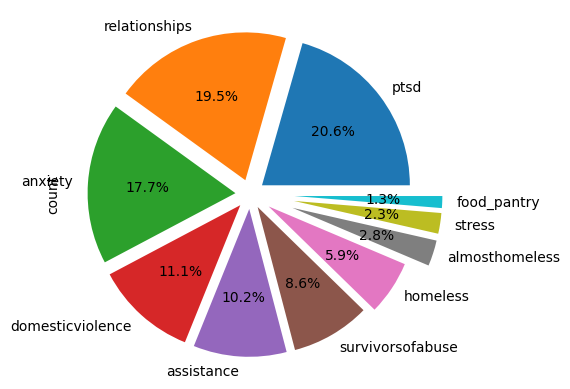

In [9]:
df['subreddit'].value_counts().plot.pie(autopct='%1.1f%%',explode=[.1,.1,.1,.1,.1,.1,.15,.3,.3,.3]);

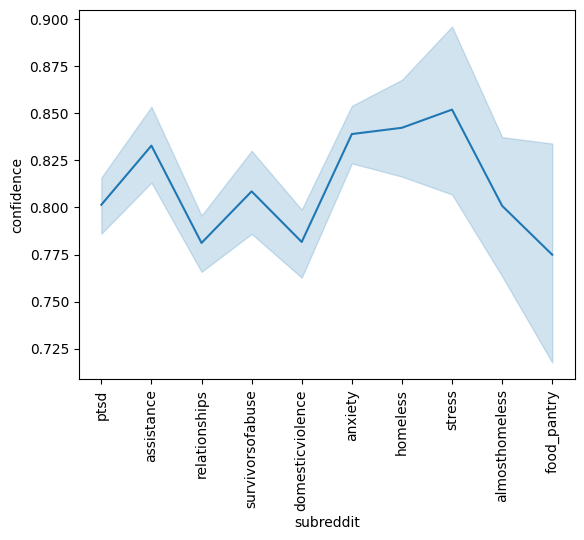

In [10]:
sns.lineplot(x='subreddit',y='confidence',data=df)
plt.xticks(rotation=90);

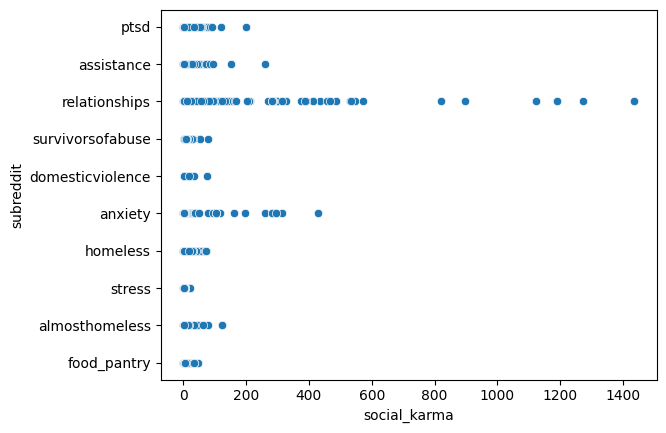

In [11]:
sns.scatterplot(x='social_karma', y='subreddit', data=df);

### NLP

In [12]:
#Imports the necessary libraries
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string

#Downloads the stopwords corpus from NLTK 
nltk.download('stopwords')

#Initializes a SnowballStemmer object for stemming words in English
stemmer=SnowballStemmer('english')  
stopwords=set(stopwords.words('english'))

def clean(text):
    text=str(text).lower()  #Converts the text to lowercase
    text=re.sub(r'https?://\S+|www\.\S+', '',text)  #Removes URLs from the text using regular expressions
    text=re.sub(r'<.*?>+', '',text)  #Removes HTML tags
    text=re.sub(r'[%s]' % re.escape(string.punctuation), '',text)  #Removes punctuation
    text=re.sub(r'\n', '',text) #Removes newline characters 
    text = re.sub(r'\w*\d\w*', '', text)  #Removes alphanumeric words containing numbers
    #Tokenizes the text into individual words, removes stopwords, and applies stemming using a list comprehension
    text = ' '.join([stemmer.stem(word) for word in text.lower().split() if word not in stopwords])
    return text
df['text']=df['text'].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tugba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df['label'].unique()

array([1, 0], dtype=int64)

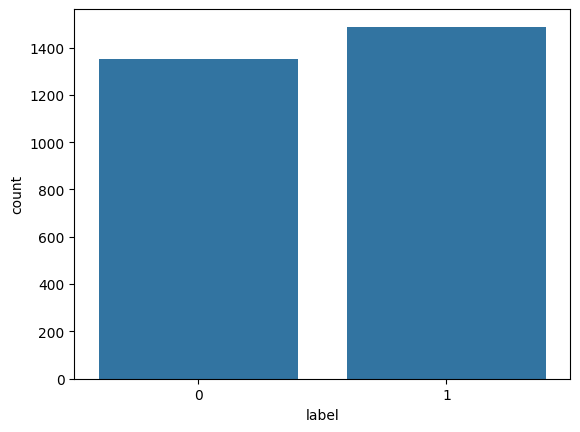

In [14]:
sns.countplot(x='label',data=df);

In [15]:
d={0:'No stress',1:'Stress'}

In [16]:
df['label']=df['label'].map(d) 

In [17]:
df=df[['text','label']]

In [18]:
df

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curre...,No stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress
...,...,...
2833,week ago precious ignor jan happi year preciou...,No stress
2834,dont abil cope anymor im tri lot thing trigger...,Stress
2835,case first time your read post look peopl will...,No stress
2836,find normal good relationship main problem see...,No stress


In [19]:
df['label'].unique()

array(['Stress', 'No stress'], dtype=object)

### Feature Engineering & Modeling - Classification

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
x=np.array(df["text"])
y=np.array(df["label"])

In [22]:
cv=CountVectorizer()
X=cv.fit_transform(x)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [24]:
g=GaussianNB()
b=BernoulliNB()
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
knc=KNeighborsClassifier()

In [25]:
b.fit(x_train,y_train)

BernoulliNB()

In [26]:
bpredict=b.predict(x_test)

In [27]:
accuracy_score(bpredict,y_test)

0.7517605633802817

In [28]:
confusion_matrix(bpredict,y_test)

array([[173,  51],
       [ 90, 254]], dtype=int64)

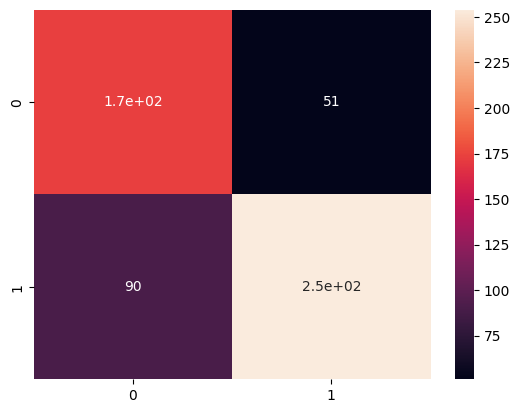

In [29]:
sns.heatmap(confusion_matrix(bpredict,y_test),annot=True);

In [30]:
print(classification_report(bpredict,y_test))

              precision    recall  f1-score   support

   No stress       0.66      0.77      0.71       224
      Stress       0.83      0.74      0.78       344

    accuracy                           0.75       568
   macro avg       0.75      0.76      0.75       568
weighted avg       0.76      0.75      0.75       568



In [31]:
lr.fit(x_train,y_train)

LogisticRegression()

In [32]:
lrpredict=lr.predict(x_test)

In [33]:
accuracy_score(lrpredict,y_test)

0.7095070422535211

In [34]:
print(classification_report(lrpredict,y_test))

              precision    recall  f1-score   support

   No stress       0.68      0.69      0.68       258
      Stress       0.74      0.73      0.73       310

    accuracy                           0.71       568
   macro avg       0.71      0.71      0.71       568
weighted avg       0.71      0.71      0.71       568



In [35]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
dtcpredict=dtc.predict(x_test)

In [37]:
accuracy_score(dtcpredict,y_test)

0.6179577464788732

In [38]:
print(classification_report(dtcpredict,y_test))

              precision    recall  f1-score   support

   No stress       0.59      0.59      0.59       262
      Stress       0.65      0.64      0.64       306

    accuracy                           0.62       568
   macro avg       0.62      0.62      0.62       568
weighted avg       0.62      0.62      0.62       568



In [39]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
rfcpredict=rfc.predict(x_test)

In [41]:
accuracy_score(rfcpredict,y_test)

0.6901408450704225

In [42]:
print(classification_report(rfcpredict,y_test))

              precision    recall  f1-score   support

   No stress       0.59      0.69      0.64       225
      Stress       0.77      0.69      0.73       343

    accuracy                           0.69       568
   macro avg       0.68      0.69      0.68       568
weighted avg       0.70      0.69      0.69       568



In [43]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [44]:
gbcpredict=gbc.predict(x_test)

In [45]:
accuracy_score(gbcpredict,y_test)

0.6778169014084507

In [46]:
print(classification_report(gbcpredict,y_test))

              precision    recall  f1-score   support

   No stress       0.66      0.65      0.65       266
      Stress       0.70      0.70      0.70       302

    accuracy                           0.68       568
   macro avg       0.68      0.68      0.68       568
weighted avg       0.68      0.68      0.68       568



In [47]:
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
kncpredict=knc.predict(x_test)

In [49]:
accuracy_score(kncpredict,y_test)

0.5193661971830986

In [50]:
print(classification_report(kncpredict,y_test))

              precision    recall  f1-score   support

   No stress       0.94      0.49      0.64       506
      Stress       0.15      0.76      0.26        62

    accuracy                           0.52       568
   macro avg       0.55      0.62      0.45       568
weighted avg       0.86      0.52      0.60       568



The results of the BernoulliNB model have shown better performance compared to other models. The weighted average F1 score was calculated as 0.75, indicating that the model has performed well overall.

In [51]:
user=input('Enter a text: ') 
df=cv.transform([user]).toarray() 
output=b.predict(df)
output

Enter a text:  I am very happy.


array(['No stress'], dtype='<U9')

In [52]:
user=input('Enter a text: ') 
df=cv.transform([user]).toarray() 
output=b.predict(df)
output

Enter a text:  I feel sick.


array(['Stress'], dtype='<U9')